In [1]:
import requests
import bs4
import csv
import pandas as pd

In [2]:
df = pd.read_csv('visitors.csv')
df

,Date,Africa,TheAmericas,"Australia,NewZealand&SouthPacific",Europe,MiddleEast,NorthAsia,South&SoutheastAsia,Taiwan,ThemainlandofChina,Macao,Total
0,2011-01-01,14470,141504,71946,143205,14927,215919,243083,182703,2503151,67122,3598030
1,2011-02-01,8914,107691,42858,121715,11177,190027,208270,165779,2008173,58466,2923070
2,2011-03-01,18778,170788,65442,176988,17926,180496,324999,158922,2009130,63402,3186871
3,2011-04-01,21341,171679,72112,179957,21580,159448,327629,197775,2136896,69543,3357960
4,2011-05-01,15733,150615,59579,135314,14217,177978,335874,164192,2115413,61113,3230028
5,2011-06-01,14074,144106,58797,109883,14029,172703,347762,184330,1924603,64935,3035222
6,2011-07-01,16175,151001,62401,132946,21706,189009,295771,216518,2677326,76535,3839388
7,2011-08-01,14438,131941,51384,145843,12581,223352,286781,195320,2914914,89207,4065761
8,2011-09-01,17007,134624,67953,133812,16549,185881,304734,174058,2094360,58113,3187091
9,2011-10-01,20541,189463,76795,199860,22080,181354,310435,180869,2542465,70214,3794076


In [3]:
from datetime import datetime
from dateutil import parser
import numpy
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

In [4]:
def parse_datetime(x):
    try:
        return parser.parse(x)
    except:
        return numpy.nan
df['datetime'] = df['Date'].apply(parse_datetime)

In [5]:
df['datetime']

0    2011-01-01
1    2011-02-01
2    2011-03-01
3    2011-04-01
4    2011-05-01
5    2011-06-01
6    2011-07-01
7    2011-08-01
8    2011-09-01
9    2011-10-01
10   2011-11-01
11   2011-12-01
12   2012-01-01
13   2012-02-01
14   2012-03-01
15   2012-04-01
16   2012-05-01
17   2012-06-01
18   2012-07-01
19   2012-08-01
20   2012-09-01
21   2012-10-01
22   2012-11-01
23   2012-12-01
24   2013-01-01
25   2013-02-01
26   2013-03-01
27   2013-04-01
28   2013-05-01
29   2013-06-01
        ...    
54   2015-07-01
55   2015-08-01
56   2015-09-01
57   2015-10-01
58   2015-11-01
59   2015-12-01
60   2016-01-01
61   2016-02-01
62   2016-03-01
63   2016-04-01
64   2016-05-01
65   2016-06-01
66   2016-07-01
67   2016-08-01
68   2016-09-01
69   2016-10-01
70   2016-11-01
71   2016-12-01
72   2017-01-01
73   2017-02-01
74   2017-03-01
75   2017-04-01
76   2017-05-01
77   2017-06-01
78   2017-07-01
79   2017-08-01
80   2017-09-01
81   2017-10-01
82   2017-11-01
83   2017-12-01
Name: datetime, Length: 

In [6]:
df['Africa'].describe()

count       84.000000
mean     13526.047619
std       3067.856679
min       6536.000000
25%      11766.000000
50%      13791.500000
75%      15674.500000
max      21341.000000
Name: Africa, dtype: float64

I. Patterns of Hong Kong visitors according to country/region of residence: 

    1) Hong Kong visitors are dominated by people from the mainland China;

    2) Except the mainland China, visitor from other countries and regions are highly seasonal.

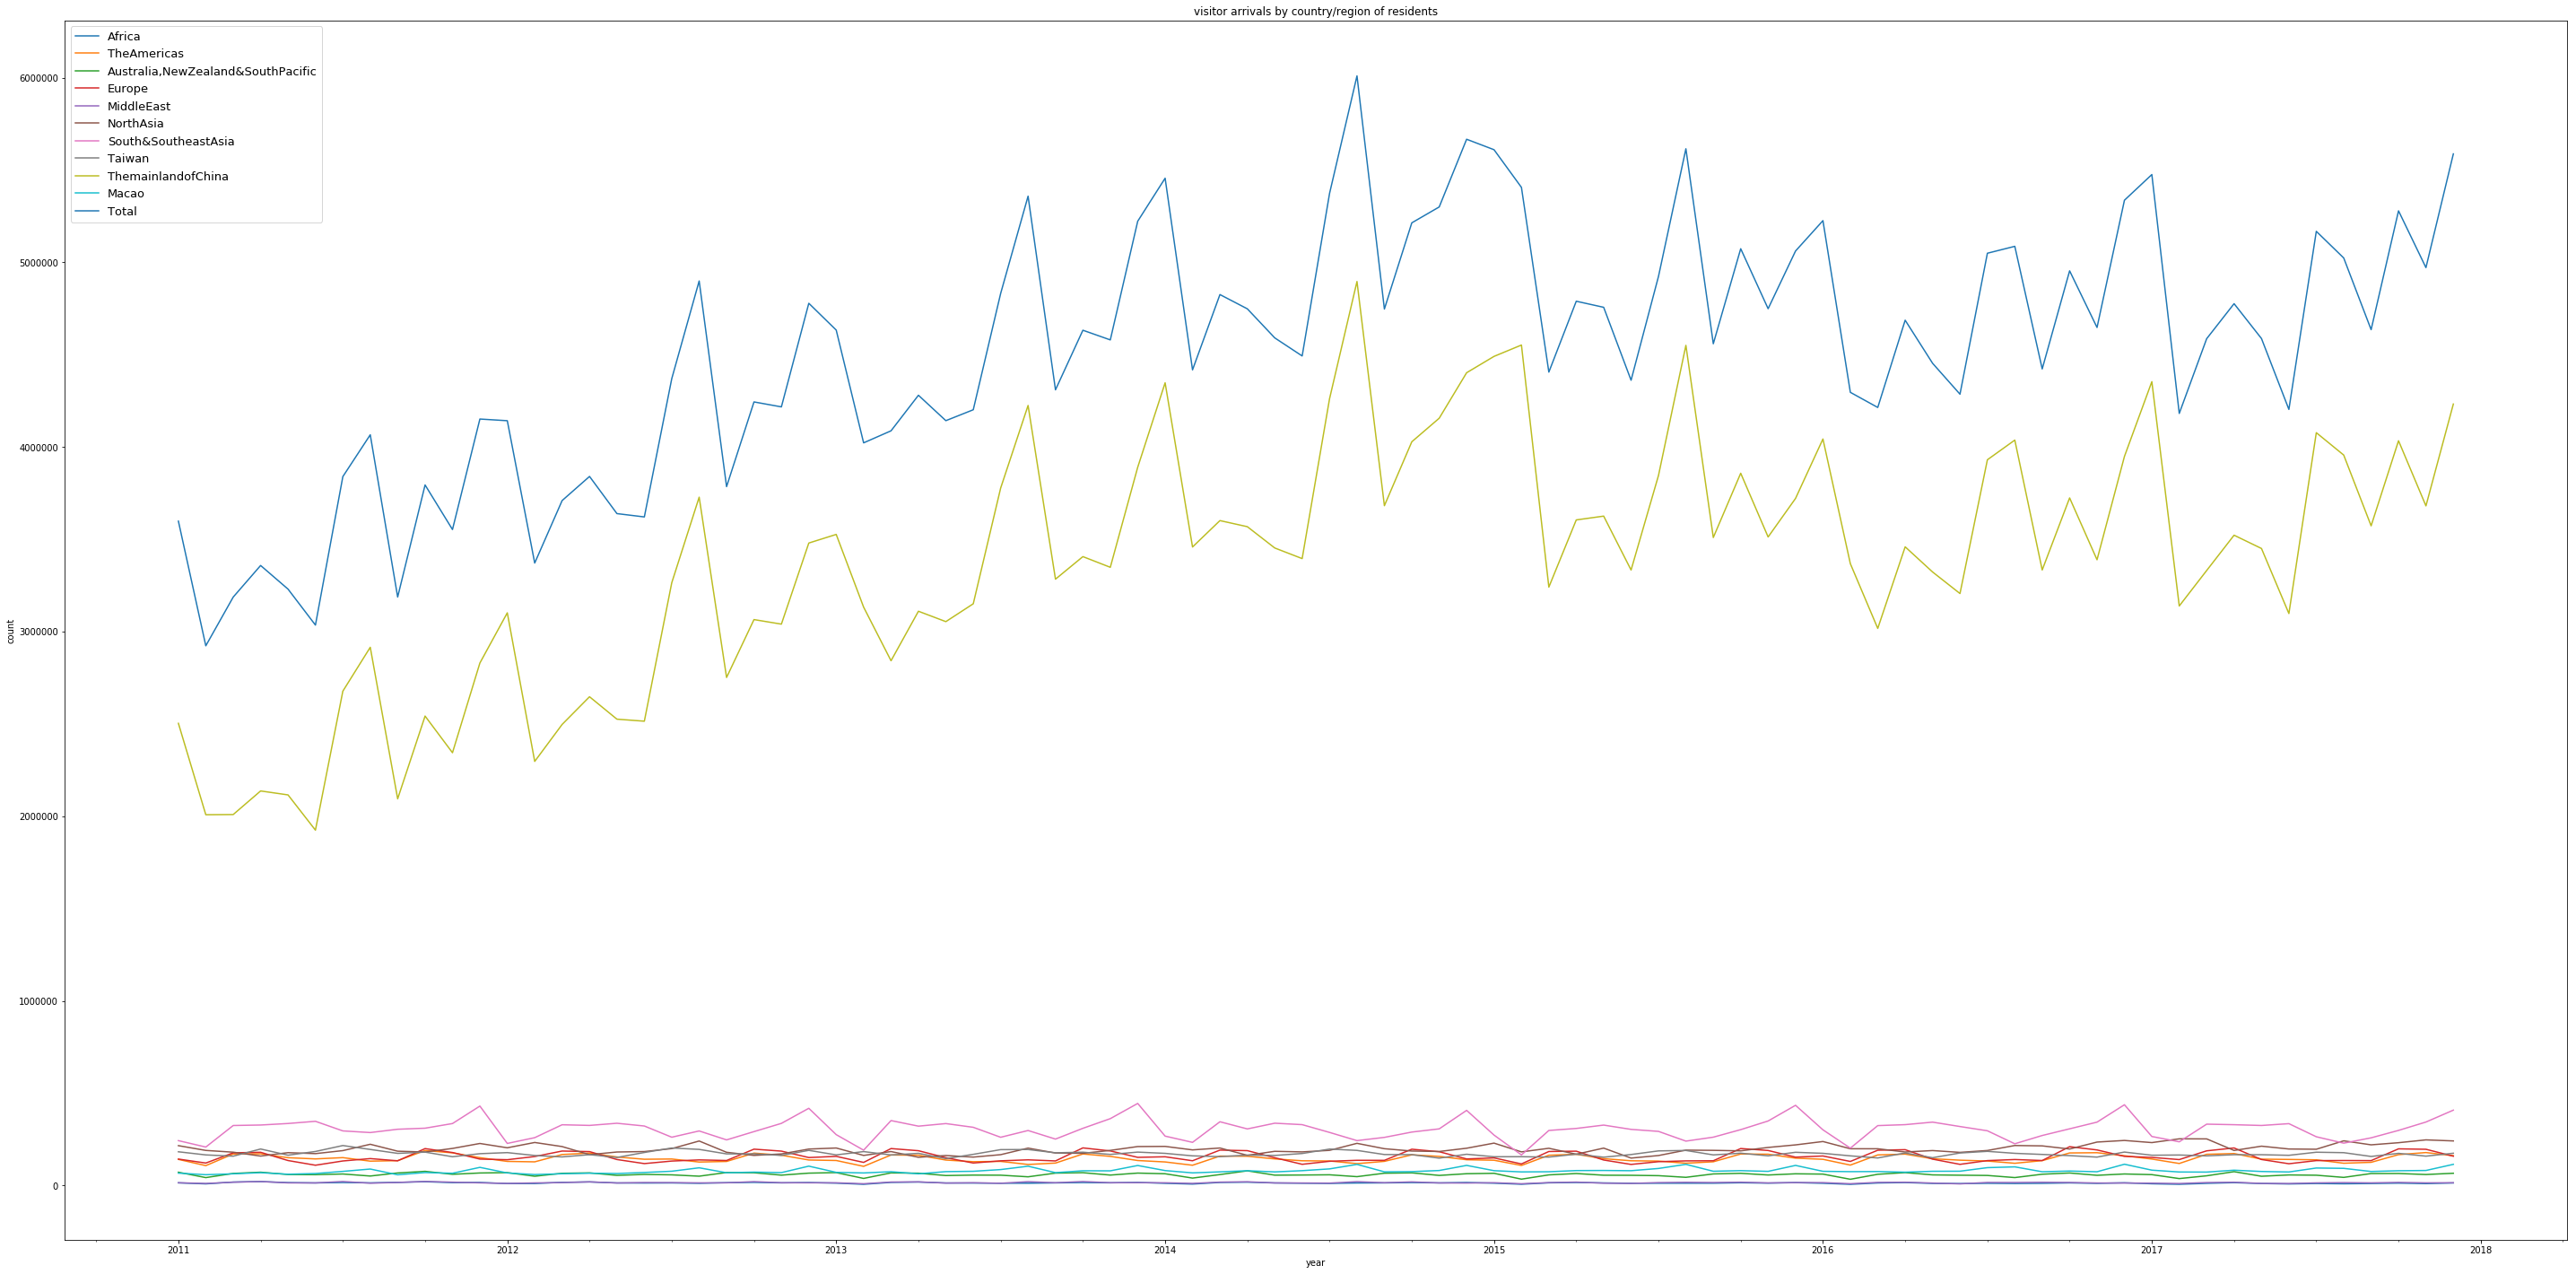

In [7]:
df_all = df.set_index('datetime').resample('1m').aggregate('sum')
df_all.plot(linewidth=1.5, figsize=(50,25))
plt.title('Visitor Arrivals By Country/Region of Residence')
plt.xlabel('Year')
plt.ylabel('Visitors')

Text(0,0.5,'count')

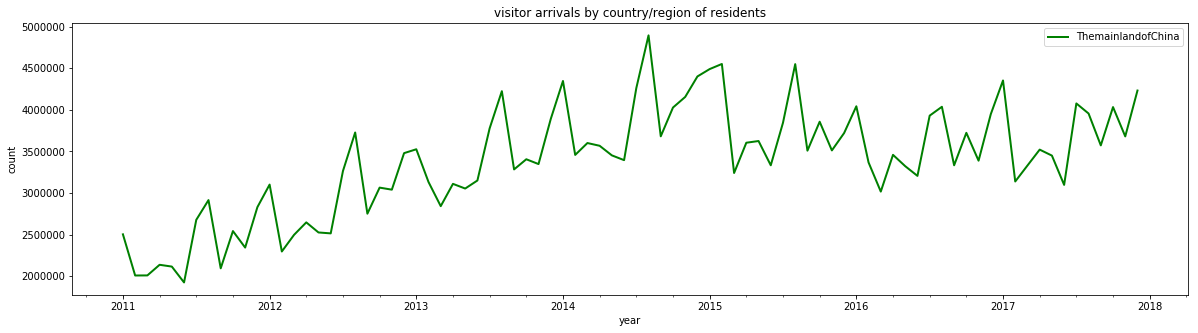

In [8]:
selected_columns = list(set(df_all.columns))
df_all[['ThemainlandofChina']].plot(linewidth=2, figsize=(20,5),color='G').plot()
plt.title('Visitor Arrivals By Country/Region of residence')
plt.xlabel('Year')
plt.ylabel('Visitors')

Text(0,0.5,'count')

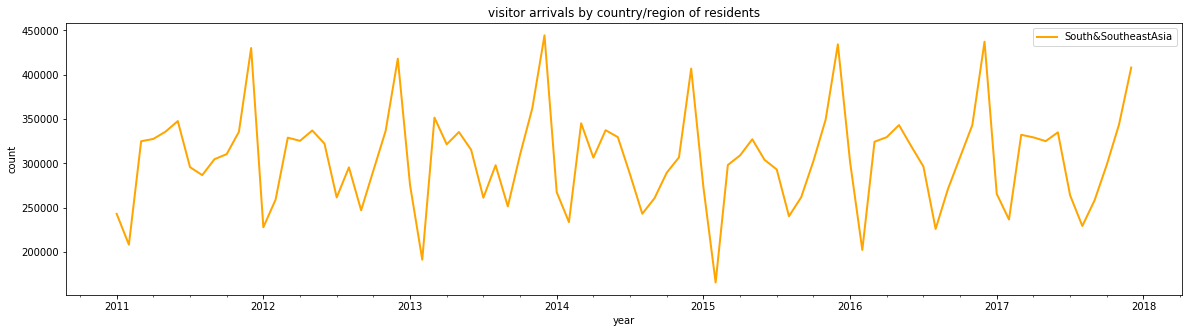

In [9]:
selected_columns = list(set(df_all.columns))
df_all[['South&SoutheastAsia']].plot(linewidth=2, figsize=(20,5),color='Orange').plot()
plt.title('Visitor Arrivals By Country/Region of Residents')
plt.xlabel('Year')
plt.ylabel('Number of Visitors')

Text(0,0.5,'count')

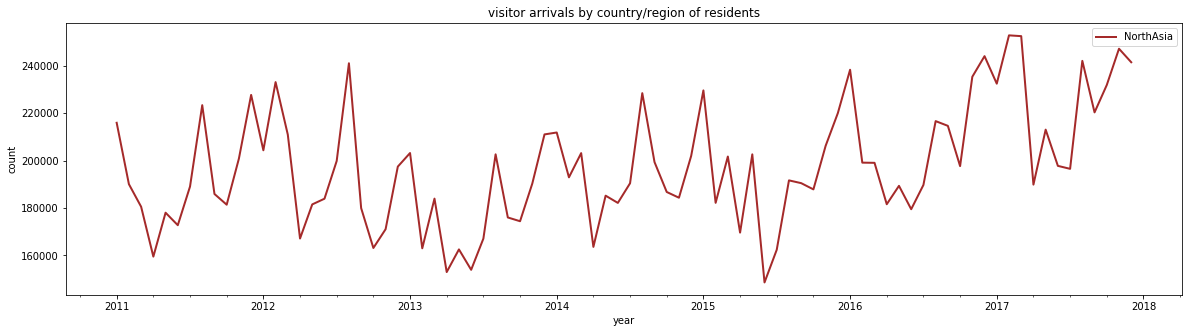

In [10]:
selected_columns = list(set(df_all.columns))
df_all[['NorthAsia']].plot(linewidth=2, figsize=(20,5),color='Brown').plot()
plt.title('Visitor Arrivals By Country/Region of Residence')
plt.xlabel('Year')
plt.ylabel('Visitors')

Text(0,0.5,'count')

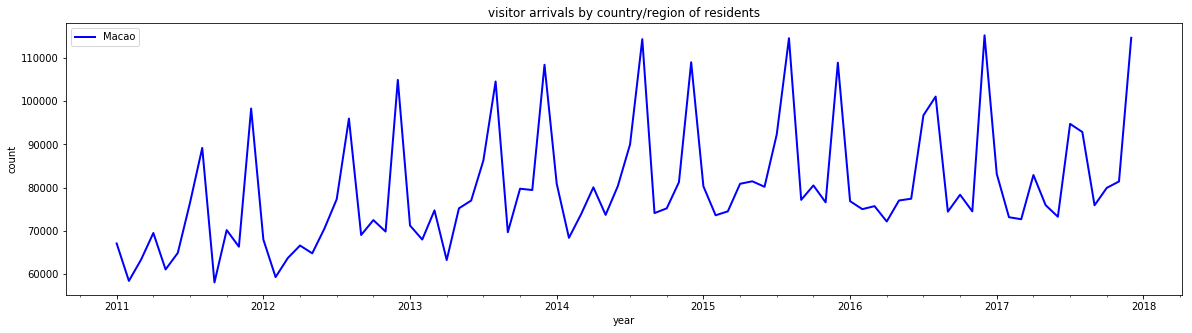

In [11]:
selected_columns = list(set(df_all.columns))
df_all[['Macao']].plot(linewidth=2, figsize=(20,5),color='blue').plot()
plt.title('Visitor Arrivals By Country/Region of Residence')
plt.xlabel('Year')
plt.ylabel('Visitors')

Text(0,0.5,'count')

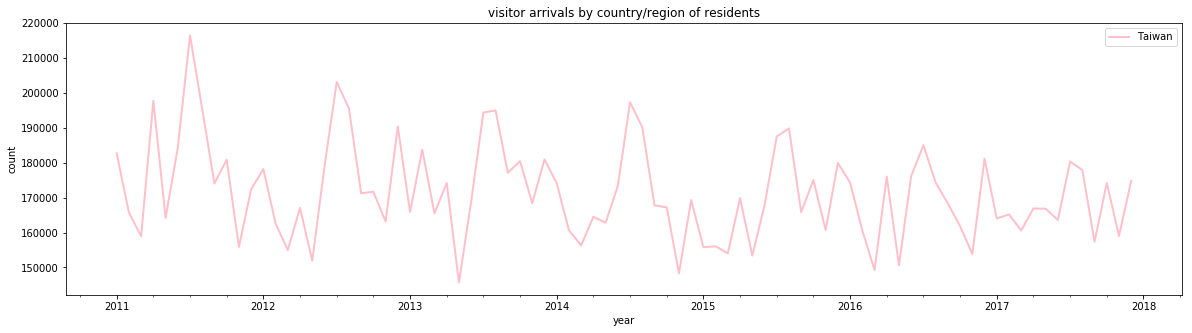

In [12]:
selected_columns = list(set(df_all.columns))
df_all[['Taiwan']].plot(linewidth=2, figsize=(20,5),color='Pink').plot()
plt.title('Visitor Arrivals By Country/Region of Residence')
plt.xlabel('Year')
plt.ylabel('Visitors')

In [13]:
df.head()

,Date,Africa,TheAmericas,"Australia,NewZealand&SouthPacific",Europe,MiddleEast,NorthAsia,South&SoutheastAsia,Taiwan,ThemainlandofChina,Macao,Total,datetime
0,2011-01-01,14470,141504,71946,143205,14927,215919,243083,182703,2503151,67122,3598030,2011-01-01
1,2011-02-01,8914,107691,42858,121715,11177,190027,208270,165779,2008173,58466,2923070,2011-02-01
2,2011-03-01,18778,170788,65442,176988,17926,180496,324999,158922,2009130,63402,3186871,2011-03-01
3,2011-04-01,21341,171679,72112,179957,21580,159448,327629,197775,2136896,69543,3357960,2011-04-01
4,2011-05-01,15733,150615,59579,135314,14217,177978,335874,164192,2115413,61113,3230028,2011-05-01


In [14]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
year = ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']
month = ['01 January', '02 February', '03 March', '04 April', '05 May', '06 June', '07 July', '08 August', '09 September',
        '10 October', '11 November', '12 December'] 
values = df['ThemainlandofChina']
np.random.seed(100)
arr_year = np.random.choice(year, size=(10000,))
list_year = list(arr_year)

arr_month= np.random.choice(month, size=(10000,))
list_month = list(arr_month)

values = np.random.randint(50, 1000, 10000)
list_values = list(values)

df2 = pd.DataFrame({'year':list_year,
                  'month': list_month,
                  'values':list_values})
df2.head()

,month,values,year
0,03 March,281,2011
1,08 August,759,2011
2,11 November,879,2014
3,02 February,673,2018
4,01 January,987,2018


In [15]:
pt = df2.pivot_table(index='month', columns='year', values='values', aggfunc=np.sum)
pt.head()

year,2011,2012,2013,2014,2015,2016,2017,2018
month,,,,,,,,
01 January,56696,52233,53909,55380,58730,58108,56758,57747
02 February,50123,57850,45952,46448,51079,53916,66838,53645
03 March,58432,47760,52198,52204,57505,57063,63134,61883
04 April,46641,56184,53430,50481,55863,43418,62530,56216
05 May,50772,65368,50983,51034,47671,56488,52055,57957


3)Visitor arrivals from the maninland China are not seasonal but are influenced by social events and exchange rates:

For instance, during the "Umbrella Revolution" in September 2014, there is a sharp drop in the number of visitors coming from the mainland;

In September 2017, visitor arrivals further dropped when typhoon no. 10 was issued in Hong Kong due to the typhoon Hato arrived, when delayed flights and heavy flooding in Hong Kong lasted for more than a month. The number of visitors from the mainland was influenced by the flu season in August in the same year.

Text(69,0.5,'month')

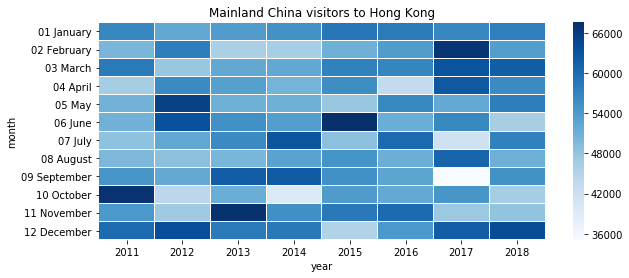

In [16]:
f, ax = plt.subplots(figsize = (10, 4))
cmap = sns.cubehelix_palette(start = 1, rot = 3, gamma=0.8, as_cmap = True)
sns.heatmap(pt, cmap = 'Blues',  linewidths = 0.05, ax = ax)
ax.set_title('Visitor Arrivals from the Mainland China')
ax.set_xlabel('Year')
ax.set_ylabel('Month')

#f.savefig('sns_heatmap_normal.jpg', bbox_inches='tight')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=-90)

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [18]:
df3 = pd.read_csv('transport_air.csv')

In [19]:
df3

,Year,2004,2005,2006,2009,2010,2011,2012,2013,2014,2015,2016
0,America,860,946,963,884,986,1028,1014,961,988,1034,1081
1,Europe Africa and the Middle East,940,1129,1248,1276,1389,1400,1441,1472,1445,1419,1488
2,Australia New Zealand and South Pacific,338,426,457,467,510,497,487,482,490,475,475
3,North Asia,992,1086,1192,1014,1197,1259,1285,1191,1315,1334,1491
4,South and Southeast Asia,1226,1441,1602,1691,2106,2290,2263,2362,2327,2335,2504
5,China,1500,1563,1901,2150,2744,3284,3814,4558,5006,5298,5033
6,Taiwan,1128,1184,1232,1120,1224,1235,1213,1250,1214,1201,1238


II. Characteristics of Hong Kong visitors by the mode of transport:

    1) Most visitors arrive Hong Kong by air, except that most visitors from the mainland China arrive Hong Kong by land; 

    2) For long haul markets, most visitors arrive Hong Kong by air and traveling by sea was their last option. However, in short haul markets, the number of visitors arrived by sea exceeded the number of visitors by land after 2011 and has continued to rise. Still, coming to Hong Kong by air has always been the first choice.

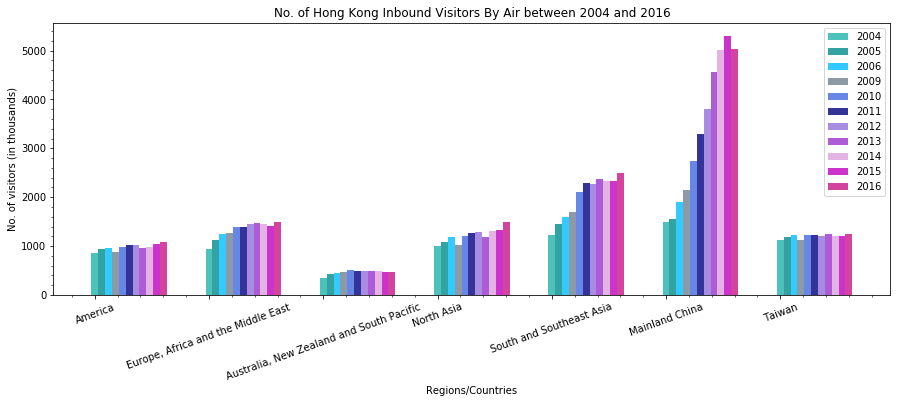

In [20]:
# data to plot
n_groups = 7
data_2004 = df3['2004']
data_2005 = df3['2005']
data_2006 = df3['2006']
data_2009 = df3['2009']
data_2010 = df3['2010']
data_2011 = df3['2011']
data_2012 = df3['2012']
data_2013 = df3['2013']
data_2014 = df3['2014']
data_2015 = df3['2015']
data_2016 = df3['2016']


# create plot
fig, ax = plt.subplots(figsize=(15, 5))
index = np.arange(n_groups)
bar_width = 0.06
opacity = 0.8
   
rects1 = plt.bar(index, data_2004, bar_width,
                 alpha=opacity,
                 color='lightseagreen',
                 label='2004')
 
rects2 = plt.bar(index + bar_width, data_2005, bar_width,
                 alpha=opacity,
                 color='darkcyan',
                 label='2005')

rects3 = plt.bar(index + bar_width + bar_width, data_2006, bar_width,
                 alpha=opacity,
                 color='deepskyblue',
                 label='2006')

rects3 = plt.bar(index + bar_width + bar_width + bar_width, data_2009, bar_width,
                 alpha=opacity,
                 color='slategray',
                 label='2009')

rects4 = plt.bar(index + bar_width + bar_width + bar_width + bar_width, data_2010, bar_width,
                 alpha=opacity,
                 color='royalblue',
                 label='2010')

rects5 = plt.bar(index + bar_width + bar_width + bar_width + bar_width + bar_width, data_2011, bar_width,
                 alpha=opacity,
                 color='navy',
                 label='2011')

rects6 = plt.bar(index + bar_width + bar_width + bar_width + bar_width + bar_width + bar_width, data_2012, bar_width,
                 alpha=opacity,
                 color='mediumpurple',
                 label='2012')

rects7 = plt.bar(index + bar_width + bar_width + bar_width + bar_width + bar_width + bar_width + bar_width, data_2013, bar_width,
                 alpha=opacity,
                 color='darkorchid',
                 label='2013')

rects8 = plt.bar(index + bar_width + bar_width + bar_width + bar_width + bar_width + bar_width + bar_width + bar_width, data_2014, bar_width,
                 alpha=opacity,
                 color='plum',
                 label='2014')

rects9 = plt.bar(index + bar_width + bar_width + bar_width + bar_width + bar_width + bar_width + bar_width + bar_width + bar_width, data_2015, bar_width,
                 alpha=opacity,
                 color='m',
                 label='2015')

rects10 = plt.bar(index + bar_width + bar_width + bar_width + bar_width + bar_width + bar_width + bar_width + bar_width + bar_width + bar_width, data_2016, bar_width,
                 alpha=opacity,
                 color='mediumvioletred',
                 label='2016')

plt.xlabel('Regions/Countries')
plt.ylabel('No. of visitors (in thousands)')
plt.title('No. of Hong Kong Inbound Visitors By Air between 2004 and 2016')
plt.xticks(np.arange(7),('America', 'Europe, Africa and the Middle East', 'Australia, New Zealand and South Pacific', 'North Asia', 'South and Southeast Asia', 'Mainland China', 'Taiwan'), rotation=20)
plt.legend()
plt.minorticks_on()
plt.autoscale(enable=True, axis='both', tight=False)
plt.show()

In [21]:
df4 = pd.read_csv('transport_land.csv')

In [22]:
df4

,Year,2004,2005,2006,2009,2010,2011,2012,2013,2014,2015,2016
0,America,351,402,440,477,537,554,528,490,480,488,478
1,Europe Africa and the Middle East,287,390,440,446,515,523,501,492,489,478,458
2,Australia New Zealand and South Pacific,96,132,143,144,157,155,145,134,124,116,109
3,North Asia,432,492,515,435,537,548,517,480,479,437,403
4,South and Southeast Asia,673,754,767,598,702,736,680,630,592,557,509
5,China,9273,9740,10374,14679,18537,23074,29193,33920,39919,38566,35906
6,Taiwan,828,823,831,797,824,781,741,707,667,680,647
7,Macao,30,35,39,47,53,56,56,57,58,58,58


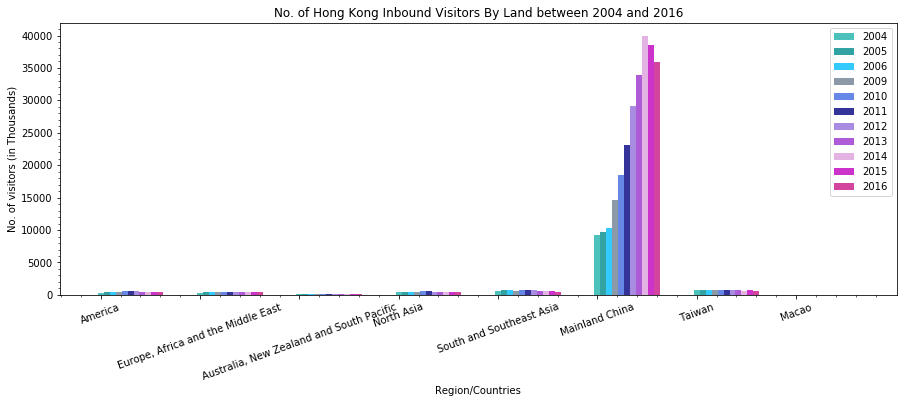

In [23]:
# data to plot
n_groups = 8
data_2004 = df4['2004']
data_2005 = df4['2005']
data_2006 = df4['2006']
data_2009 = df4['2009']
data_2010 = df4['2010']
data_2011 = df4['2011']
data_2012 = df4['2012']
data_2013 = df4['2013']
data_2014 = df4['2014']
data_2015 = df4['2015']
data_2016 = df4['2016']


# create plot
fig, ax = plt.subplots(figsize=(15, 5))
index = np.arange(n_groups)
bar_width = 0.06
opacity = 0.8
   
rects1 = plt.bar(index, data_2004, bar_width,
                 alpha=opacity,
                 color='lightseagreen',
                 label='2004')
 
rects2 = plt.bar(index + bar_width, data_2005, bar_width,
                 alpha=opacity,
                 color='darkcyan',
                 label='2005')

rects3 = plt.bar(index + bar_width + bar_width, data_2006, bar_width,
                 alpha=opacity,
                 color='deepskyblue',
                 label='2006')

rects3 = plt.bar(index + bar_width + bar_width + bar_width, data_2009, bar_width,
                 alpha=opacity,
                 color='slategray',
                 label='2009')

rects4 = plt.bar(index + bar_width + bar_width + bar_width + bar_width, data_2010, bar_width,
                 alpha=opacity,
                 color='royalblue',
                 label='2010')

rects5 = plt.bar(index + bar_width + bar_width + bar_width + bar_width + bar_width, data_2011, bar_width,
                 alpha=opacity,
                 color='navy',
                 label='2011')

rects6 = plt.bar(index + bar_width + bar_width + bar_width + bar_width + bar_width + bar_width, data_2012, bar_width,
                 alpha=opacity,
                 color='mediumpurple',
                 label='2012')

rects7 = plt.bar(index + bar_width + bar_width + bar_width + bar_width + bar_width + bar_width + bar_width, data_2013, bar_width,
                 alpha=opacity,
                 color='darkorchid',
                 label='2013')

rects8 = plt.bar(index + bar_width + bar_width + bar_width + bar_width + bar_width + bar_width + bar_width + bar_width, data_2014, bar_width,
                 alpha=opacity,
                 color='plum',
                 label='2014')

rects9 = plt.bar(index + bar_width + bar_width + bar_width + bar_width + bar_width + bar_width + bar_width + bar_width + bar_width, data_2015, bar_width,
                 alpha=opacity,
                 color='m',
                 label='2015')

rects10 = plt.bar(index + bar_width + bar_width + bar_width + bar_width + bar_width + bar_width + bar_width + bar_width + bar_width + bar_width, data_2016, bar_width,
                 alpha=opacity,
                 color='mediumvioletred',
                 label='2016')

plt.xlabel('Region/Countries')
plt.ylabel('No. of visitors (in Thousands)')
plt.title('No. of Hong Kong Inbound Visitors By Land between 2004 and 2016')
plt.xticks(np.arange(8), ('America', 'Europe, Africa and the Middle East', 'Australia, New Zealand and South Pacific', 'North Asia', 'South and Southeast Asia', 'Mainland China', 'Taiwan', 'Macao'), rotation=20)
plt.legend()
plt.minorticks_on()
plt.autoscale(enable=True, axis='both', tight=None)
plt.show()

In [24]:
df5 = pd.read_csv('transport_sea.csv')

In [25]:
df5

,Year,2004,2005,2006,2009,2010,2011,2012,2013,2014,2015,2016
0,America,189,217,227,207,226,239,236,214,211,206,215
1,Europe Africa and the Middle East,153,206,229,247,270,272,287,289,284,270,281
2,Australia New Zealand and South Pacific,49,62,68,97,101,106,109,102,101,91,101
3,North Asia,241,275,322,374,474,498,531,470,537,521,591
4,South and Southeast Asia,179,219,291,596,693,725,709,726,696,667,688
5,China,1473,1238,1317,1128,1404,1742,1904,2267,2322,1979,1839
6,Taiwan,119,124,115,93,117,133,134,143,151,135,126
7,Macao,425,446,508,601,697,754,784,846,880,887,848


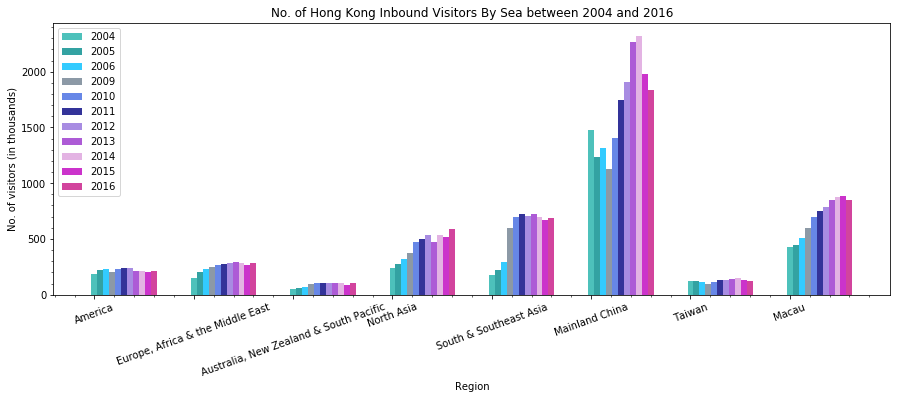

In [26]:
# data to plot
n_groups = 8
data_2004 = df5['2004']
data_2005 = df5['2005']
data_2006 = df5['2006']
data_2009 = df5['2009']
data_2010 = df5['2010']
data_2011 = df5['2011']
data_2012 = df5['2012']
data_2013 = df5['2013']
data_2014 = df5['2014']
data_2015 = df5['2015']
data_2016 = df5['2016']


# create plot
fig, ax = plt.subplots(figsize=(15, 5))
index = np.arange(n_groups)
bar_width = 0.06
opacity = 0.8
   
rects1 = plt.bar(index, data_2004, bar_width,
                 alpha=opacity,
                 color='lightseagreen',
                 label='2004')
 
rects2 = plt.bar(index + bar_width, data_2005, bar_width,
                 alpha=opacity,
                 color='darkcyan',
                 label='2005')

rects3 = plt.bar(index + bar_width + bar_width, data_2006, bar_width,
                 alpha=opacity,
                 color='deepskyblue',
                 label='2006')

rects3 = plt.bar(index + bar_width + bar_width + bar_width, data_2009, bar_width,
                 alpha=opacity,
                 color='slategray',
                 label='2009')

rects4 = plt.bar(index + bar_width + bar_width + bar_width + bar_width, data_2010, bar_width,
                 alpha=opacity,
                 color='royalblue',
                 label='2010')

rects5 = plt.bar(index + bar_width + bar_width + bar_width + bar_width + bar_width, data_2011, bar_width,
                 alpha=opacity,
                 color='navy',
                 label='2011')

rects6 = plt.bar(index + bar_width + bar_width + bar_width + bar_width + bar_width + bar_width, data_2012, bar_width,
                 alpha=opacity,
                 color='mediumpurple',
                 label='2012')

rects7 = plt.bar(index + bar_width + bar_width + bar_width + bar_width + bar_width + bar_width + bar_width, data_2013, bar_width,
                 alpha=opacity,
                 color='darkorchid',
                 label='2013')

rects8 = plt.bar(index + bar_width + bar_width + bar_width + bar_width + bar_width + bar_width + bar_width + bar_width, data_2014, bar_width,
                 alpha=opacity,
                 color='plum',
                 label='2014')

rects9 = plt.bar(index + bar_width + bar_width + bar_width + bar_width + bar_width + bar_width + bar_width + bar_width + bar_width, data_2015, bar_width,
                 alpha=opacity,
                 color='m',
                 label='2015')

rects10 = plt.bar(index + bar_width + bar_width + bar_width + bar_width + bar_width + bar_width + bar_width + bar_width + bar_width + bar_width, data_2016, bar_width,
                 alpha=opacity,
                 color='mediumvioletred',
                 label='2016')

plt.xlabel('Region')
plt.ylabel('No. of visitors (in thousands)')
plt.title('No. of Hong Kong Inbound Visitors By Sea between 2004 and 2016')
plt.xticks(np.arange(8), ('America', 'Europe, Africa & the Middle East', 'Australia, New Zealand & South Pacific', 'North Asia', 'South & Southeast Asia', 'Mainland China', 'Taiwan', 'Macau'), rotation=20)
plt.legend()
plt.minorticks_on()
plt.autoscale(enable=True, axis='both', tight=False)
plt.show()

In [27]:
df_long = pd.read_csv('long_haul_market.csv')

In [28]:
df_long

,Year,By air,By land,By sea
0,2004,2138,734,238
1,2005,2501,924,279
2,2006,2668,1023,295
3,2009,2627,1067,304
4,2010,2885,1209,327
5,2011,2925,1232,345
6,2012,2942,1174,345
7,2013,2915,1116,316
8,2014,2923,1093,312
9,2015,2928,1082,567


Text(0.5,1,'Mode of Transport of Hong Kong Inbound Visitors (Long Haul Markets)')

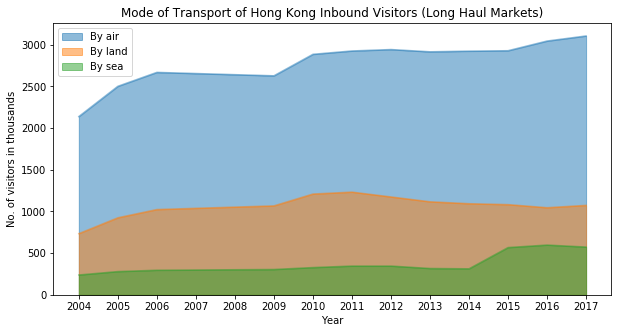

In [29]:
df_long = df_long.set_index('Year')
df_long.plot(kind='area', stacked=False, figsize=(10,5))
plt.ylabel('No. of visitors in thousands')
plt.xlabel('Year')
plt.xticks(np.arange(2004,2018, step=1))
plt.title('Mode of Transport of Hong Kong Inbound Visitors (Long Haul Markets)')

In [30]:
df_short = pd.read_csv('short_haul_market.csv')

In [31]:
df_short

,Year,By air,By land,By sea
0,2004,3375,1963,964
1,2005,3740,2104,1064
2,2006,4057,2152,1236
3,2009,3848,1877,1664
4,2010,4557,2116,1981
5,2011,4818,2121,2110
6,2012,4804,1994,2158
7,2013,4858,1874,2185
8,2014,4920,1796,2264
9,2015,4947,1732,2210


Text(0.5,1,'Mode of Transport of Hong Kong Inbound Visitors (Short Haul Markets excluding Mainland China)')

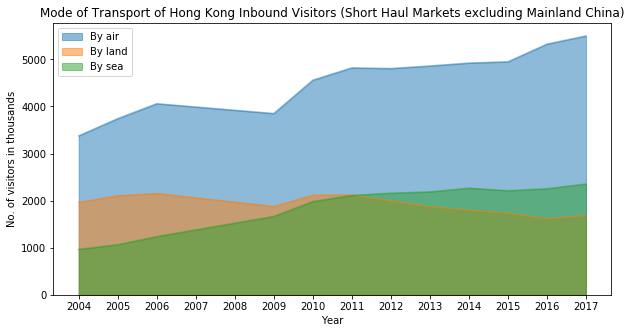

In [32]:
df_short = df_short.set_index('Year')
df_short.plot(kind='area', stacked=False, figsize=(10,5))
plt.ylabel('No. of visitors in thousands')
plt.xlabel('Year')
plt.xticks(np.arange(2004,2018, step=1))
plt.title('Mode of Transport of Hong Kong Inbound Visitors (Short Haul Markets excluding Mainland China)')

In [33]:
df_mainland = pd.read_csv('mainland.csv')

Text(0.5,1,'Mode of Transport of Hong Kong Inbound Visitors (Mainland China)')

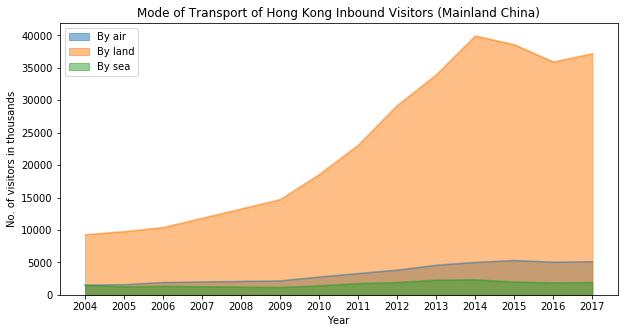

In [34]:
df_mainland = df_mainland.set_index('Year')
df_mainland.plot(kind='area', stacked=False, figsize=(10,5))
plt.ylabel('No. of visitors in thousands')
plt.xlabel('Year')
plt.xticks(np.arange(2004,2018, step=1))
plt.title('Mode of Transport of Hong Kong Inbound Visitors (Mainland China)')

In [35]:
from mpl_toolkits.mplot3d import Axes3D

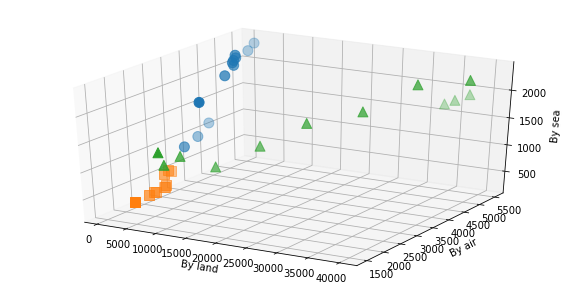

In [36]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')

x1 = df_short['By land'] 
y1 = df_short['By air']
z1 = df_short['By sea']

x2 = df_long['By land'] 
y2 = df_long['By air']
z2 = df_long['By sea']

x3 = df_mainland['By land'] 
y3 = df_mainland['By air']
z3 = df_mainland['By sea']

ax.scatter(x1, y1, z1, s=100,depthshade=True, marker='o')
ax.scatter(x2, y2, z2, s=100,depthshade=True, marker='s')
ax.scatter(x3, y3, z3, s=100,depthshade=True, marker='^')

ax.set_xlabel('By land')
ax.set_ylabel('By air')
ax.set_zlabel('By sea')

plt.show()

In [37]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from dateutil import parser

In [38]:
df=pd.read_csv('consumption 1.csv')

In [39]:
df

,Year,The Americas,Europe Africa and the Middle East,Australia New Zealand South Pacific,North Asia,South and SoutheastAsia,Taiwan,The mainland of China,Macao,Total
0,2011-12-31,245000000,377000000,119000000,428000000,686000000,859000000,35360000000,1285000000,39358000000
1,2012-12-31,233000000,261000000,98000000,418000000,567000000,695000000,49278000000,1056000000,52606000000
2,2013-12-31,188000000,301000000,85000000,407000000,613000000,742000000,64356000000,1341000000,68034000000
3,2014-12-31,225000000,279000000,77000000,352000000,622000000,728000000,76076000000,1385000000,79744000000
4,2015-12-31,233000000,319000000,78000000,320000000,538000000,694000000,75058000000,1241000000,78482000000
5,2016-12-31,210000000,325000000,86000000,306000000,558000000,695000000,60278000000,1195000000,63653000000


In [40]:
from datetime import datetime
from dateutil import parser
import numpy

III. The consumption expenditure patterns of Hong Kong visitors:

    1) The Mainland China made up of the largest part in same-day consumption. And it has a big gap with other countries;

    2) Apart from the Mainland China, Macao, Taiwan, South and Southeast Asia are the top three regions with the highest consumption;

    3) In the per capita overnight consumption, Hong Kong visitors from the Mainland still account for the highest but not as dominate as those for same-day consumption;

    4) Macao is the second highest in per capita same-day consumption while it is the smallest in per capita overnight consumption;

    5) Apart from the Mainland China, the total consumption of overnight visitors from South and Southeast Asia have been higher than visitors from Europe and America.

In [41]:
def parse_datetime(x):
    try:
        return parser.parse(x)
    except:
        return numpy.nan
df['datetime'] = df['Year'].apply(parse_datetime)

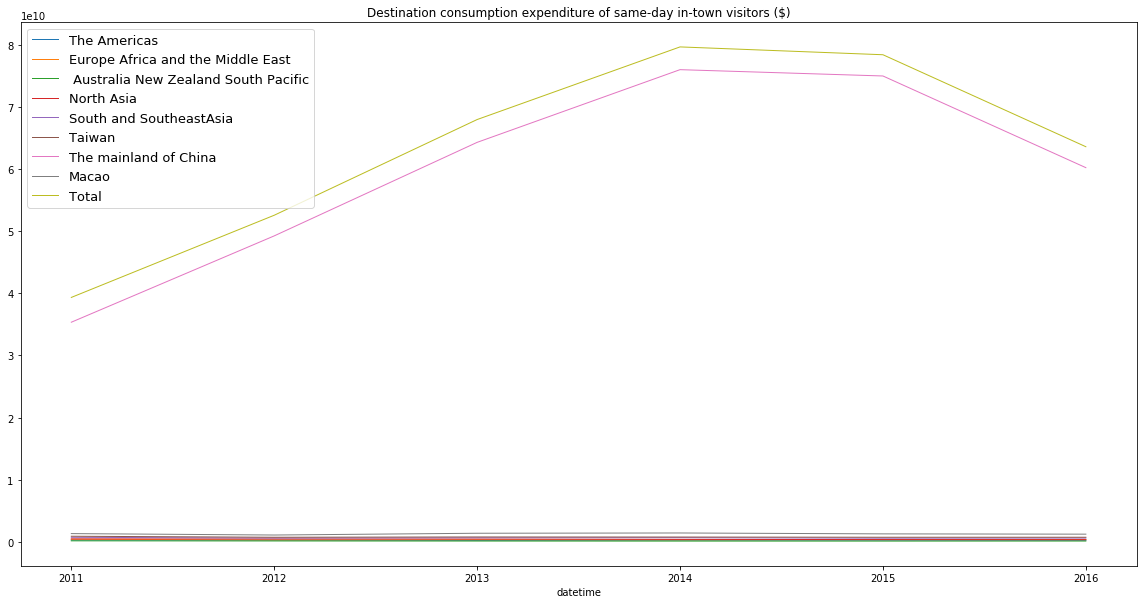

In [42]:
df_all=df.set_index('datetime').resample('1y').aggregate('sum')
df_all.plot(linewidth=1, figsize=(20,10)).plot()
plt.title('Destination consumption expenditure of same-day in-town visitors ($)')
plt.legend(loc=2,prop={'size':13})

Text(0.5,1,'Destination consumption expenditure of same-day in-town visitors except for Total and mainland China ($)')

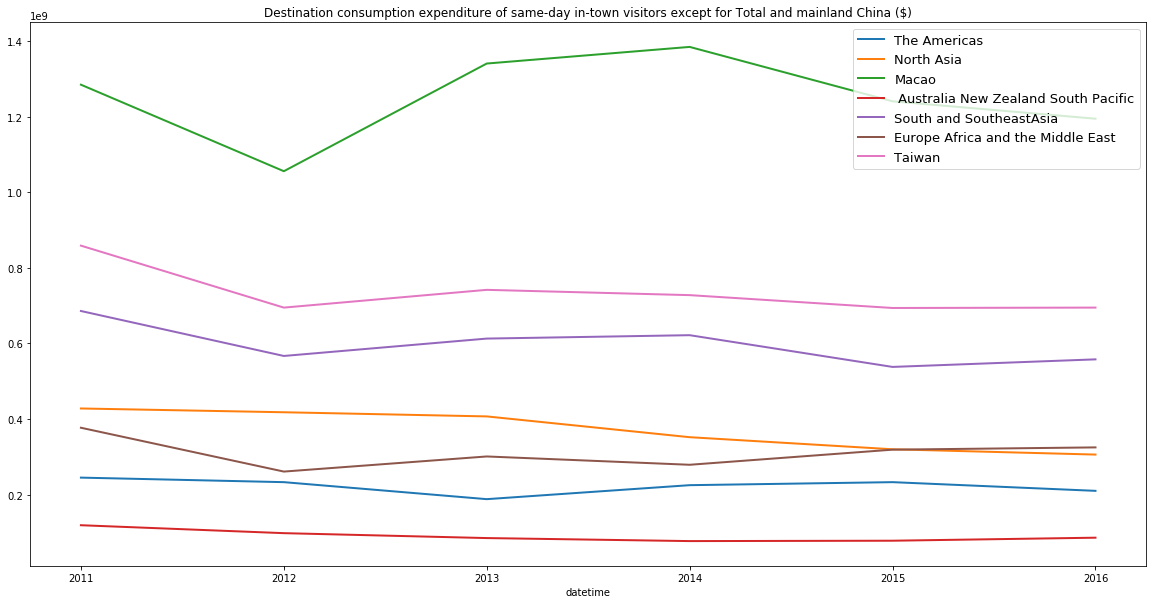

In [43]:
selected_columns = list(set(df_all.columns) - set(['Total', 'The mainland of China']))
df_all[selected_columns].plot(linewidth=2, figsize=(20,10)).plot()
plt.legend(loc=1,prop={'size':13})
plt.title('Destination consumption expenditure of same-day in-town visitors except for Total and mainland China ($)')

In [44]:
df=pd.read_csv('consumption 2.csv')

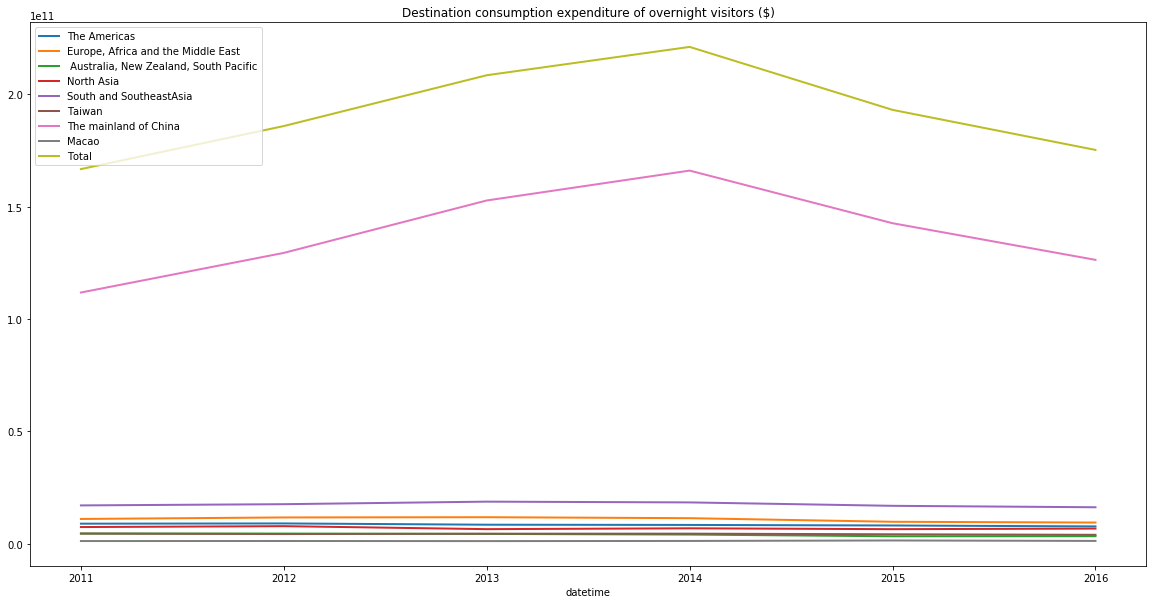

In [45]:
def parse_datetime(x):
    try:
        return parser.parse(x)
    except:
        return numpy.nan
df['datetime'] = df['Year'].apply(parse_datetime)

df_all=df.set_index('datetime').resample('1y').aggregate('sum')
df_all.plot(linewidth=2, figsize=(20,10)).plot()
plt.title('Destination consumption expenditure of overnight visitors ($)')
plt.legend(loc=2,prop={'size':10})

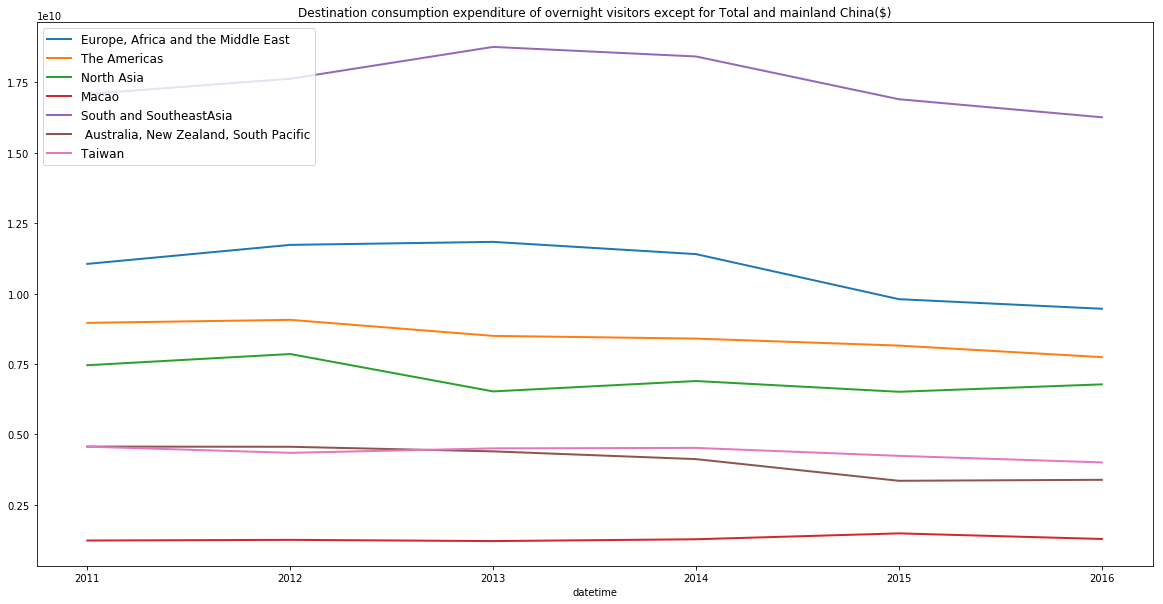

In [46]:
selected_columns = list(set(df_all.columns) - set(['Total', 'The mainland of China']))
df_all[selected_columns].plot(linewidth=2, figsize=(20,10)).plot()
plt.title('Destination consumption expenditure of overnight visitors except for Total and mainland China($)')
plt.legend(loc=2,prop={'size':12})

In [47]:
df=pd.read_csv('per capita 1.csv')

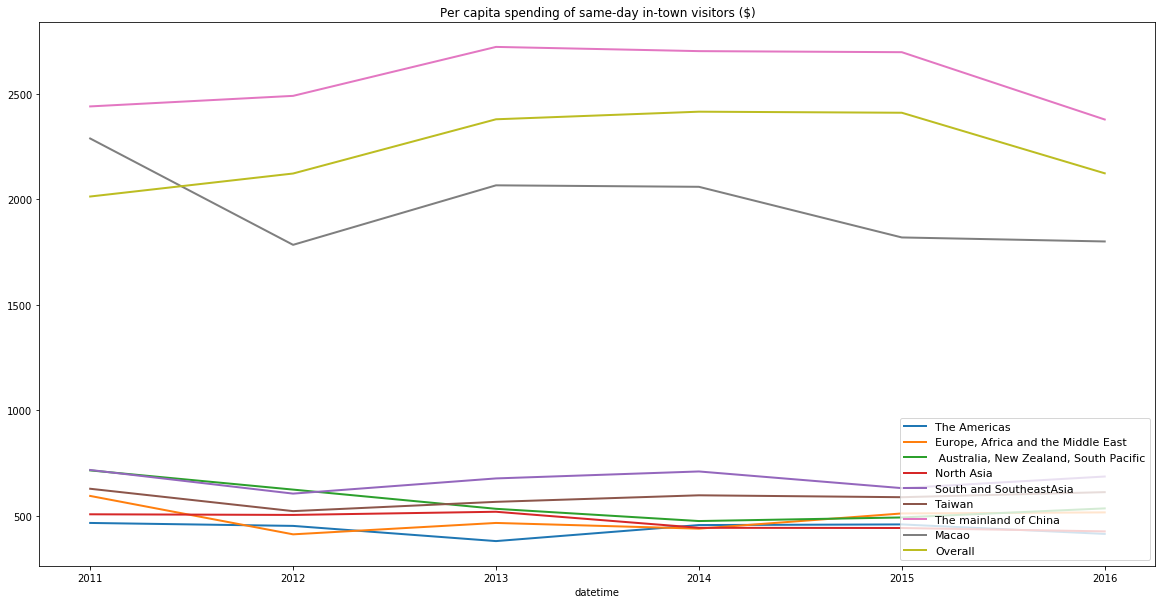

In [48]:
def parse_datetime(x):
    try:
        return parser.parse(x)
    except:
        return numpy.nan
df['datetime'] = df['Year'].apply(parse_datetime)

df_all=df.set_index('datetime').resample('1y').aggregate('sum')
df_all.plot(linewidth=2, figsize=(20,10)).plot()
plt.title('Per capita spending of same-day in-town visitors ($)')
plt.legend(loc=4,prop={'size':11})

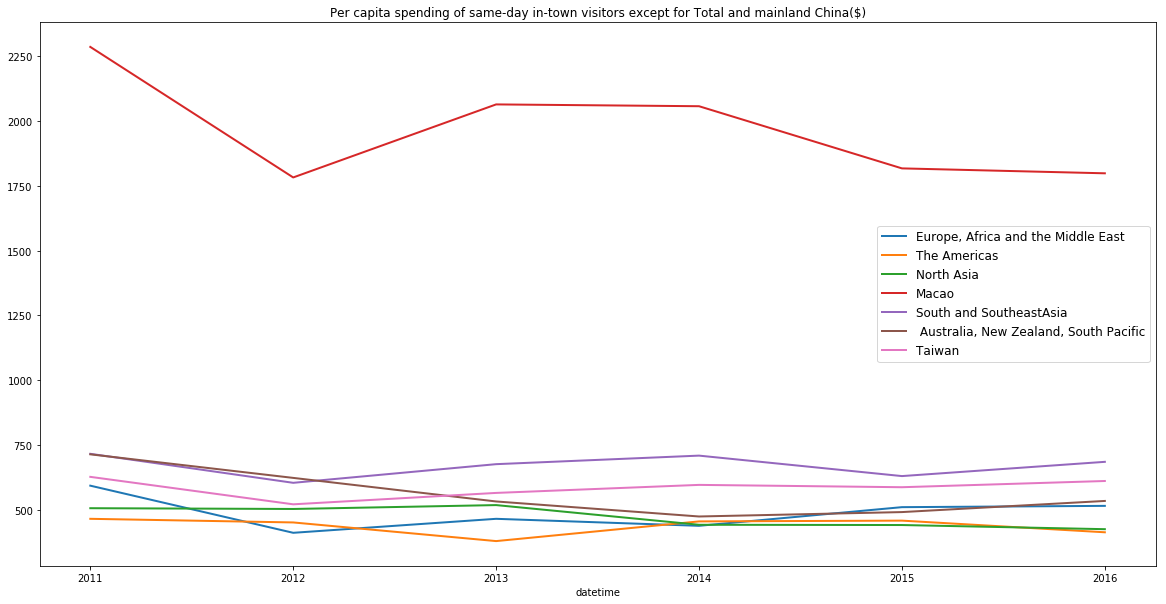

In [49]:
selected_columns = list(set(df_all.columns) - set(['Overall', 'The mainland of China']))
df_all[selected_columns].plot(linewidth=2, figsize=(20,10)).plot()
plt.title('Per capita spending of same-day in-town visitors except for Total and mainland China($)')
plt.legend(prop={'size':12})

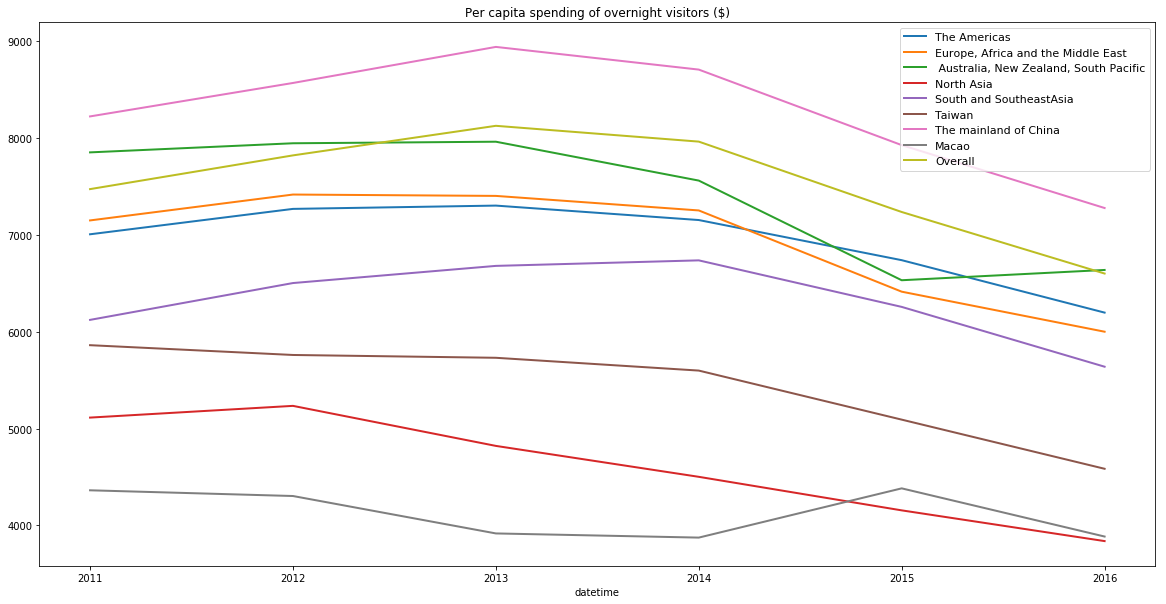

In [50]:
df=pd.read_csv('per captia 2.csv')

def parse_datetime(x):
    try:
        return parser.parse(x)
    except:
        return numpy.nan
df['datetime'] = df['Year'].apply(parse_datetime)

df_all=df.set_index('datetime').resample('1y').aggregate('sum')
df_all.plot(linewidth=2, figsize=(20,10)).plot()
plt.title('Per capita spending of overnight visitors ($)')
plt.legend(loc=1,prop={'size':11})

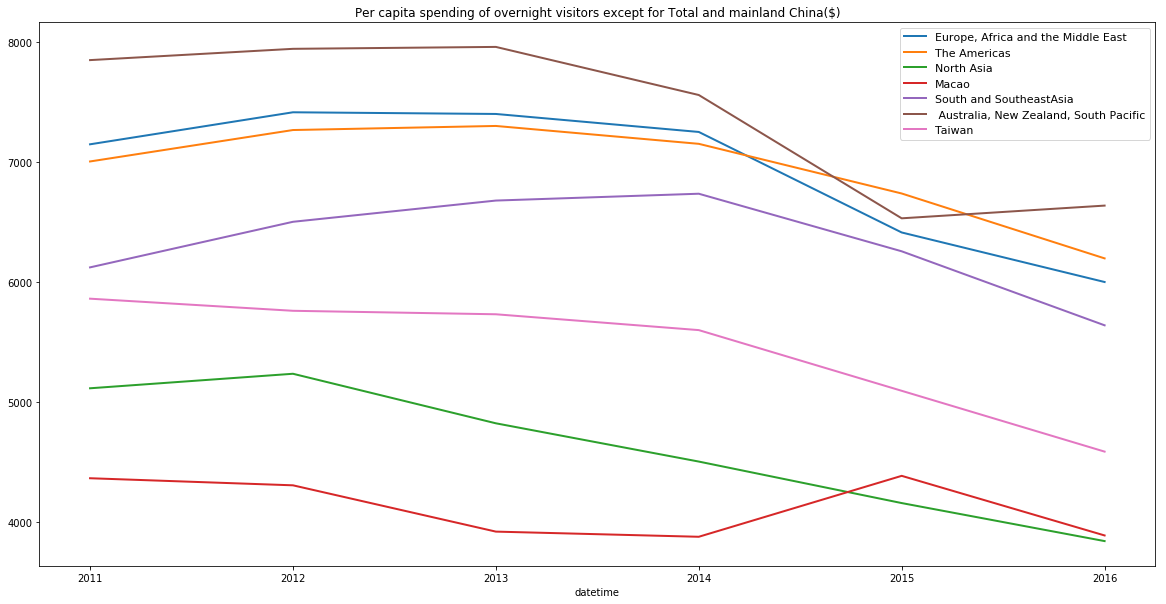

In [51]:
selected_columns = list(set(df_all.columns) - set(['Overall', 'The mainland of China']))
df_all[selected_columns].plot(linewidth=2, figsize=(20,10)).plot()
plt.title('Per capita spending of overnight visitors except for Total and mainland China($)')
plt.legend(loc=1,prop={'size':11})